# My Capstone Project
### This repository will be used for sharing my IBM data science capstone project

# 1. Starting up
## 1.1 Load libraries

In [1]:
# Let's start by importing the core libraries
# suppress all warnings
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss


os.chdir("C:/Users/alfre/Documents/Learning/Coursera/Capstone")
plt.style.use('classic')
%matplotlib inline
plt.style.use('ggplot')

## 1.2 Load and initially explore the datasets

In [2]:
# Load accident data 
accident_data = pd.read_csv("Dataset/Kaggle/Accident_Information.csv", low_memory=False)
# Load vehicle information data
vehicle_data = pd.read_csv("Dataset/Kaggle/Vehicle_Information.csv", low_memory=False, encoding='ISO-8859-1')

In [3]:
# View feature types
accident_data.dtypes

Accident_Index                                  object
1st_Road_Class                                  object
1st_Road_Number                                float64
2nd_Road_Class                                  object
2nd_Road_Number                                float64
Accident_Severity                               object
Carriageway_Hazards                             object
Date                                            object
Day_of_Week                                     object
Did_Police_Officer_Attend_Scene_of_Accident    float64
Junction_Control                                object
Junction_Detail                                 object
Latitude                                       float64
Light_Conditions                                object
Local_Authority_(District)                      object
Local_Authority_(Highway)                       object
Location_Easting_OSGR                          float64
Location_Northing_OSGR                         float64
Longitude 

In [4]:
vehicle_data.dtypes

Accident_Index                       object
Age_Band_of_Driver                   object
Age_of_Vehicle                      float64
Driver_Home_Area_Type                object
Driver_IMD_Decile                   float64
Engine_Capacity_.CC.                float64
Hit_Object_in_Carriageway            object
Hit_Object_off_Carriageway           object
Journey_Purpose_of_Driver            object
Junction_Location                    object
make                                 object
model                                object
Propulsion_Code                      object
Sex_of_Driver                        object
Skidding_and_Overturning             object
Towing_and_Articulation              object
Vehicle_Leaving_Carriageway          object
Vehicle_Location.Restricted_Lane    float64
Vehicle_Manoeuvre                    object
Vehicle_Reference                     int64
Vehicle_Type                         object
Was_Vehicle_Left_Hand_Drive          object
X1st_Point_of_Impact            

In [5]:
# Get counts of rows and columns in both datasets
print ('Accident data shape:', accident_data.shape, '\nVehicle data shape:', vehicle_data.shape)

Accident data shape: (2047256, 34) 
Vehicle data shape: (2177205, 24)


In [6]:
# Count missing values
print ('Count of missing values in accident data', "\n",accident_data.isna().sum (), 
       '\nCount of missing values in vehicle data', "\n",vehicle_data.isna().sum ())

Count of missing values in accident data 
 Accident_Index                                      0
1st_Road_Class                                      0
1st_Road_Number                                     2
2nd_Road_Class                                 844272
2nd_Road_Number                                 17593
Accident_Severity                                   0
Carriageway_Hazards                                 0
Date                                                0
Day_of_Week                                         0
Did_Police_Officer_Attend_Scene_of_Accident       278
Junction_Control                                    0
Junction_Detail                                     0
Latitude                                          174
Light_Conditions                                    0
Local_Authority_(District)                          0
Local_Authority_(Highway)                           0
Location_Easting_OSGR                             164
Location_Northing_OSGR                 

In [7]:
# Merge the two datasets keeping only records in both
data_both = pd.merge (accident_data, vehicle_data, how='inner', on=['Accident_Index', 'Year'])

In [8]:
# Explore the target variable
data_both['Accident_Severity'].value_counts(normalize=True)*100

Slight     85.777455
Serious    12.894723
Fatal       1.327822
Name: Accident_Severity, dtype: float64

In [9]:
# Convert target variable from three classes to two classes
data_both['Accident_Severity'] = data_both['Accident_Severity'].replace(['Serious', 'Fatal'], 'Serious')

In [10]:
# Explore new target
data_both['Accident_Severity'].value_counts(normalize=True)*100

Slight     85.777455
Serious    14.222545
Name: Accident_Severity, dtype: float64

## 1.3 Selection of features 
Here we select only the features we will be using for modelling and perform feature engineering on those. 

In [11]:
# Select only the variables needed for modelling
data_analysis = data_both[["Accident_Severity", "Day_of_Week", "Junction_Control", "Junction_Detail",
                         "Road_Surface_Conditions", "Road_Type", "Speed_limit", "Time", 
                         "Urban_or_Rural_Area", "Weather_Conditions", "Year", "Age_Band_of_Driver", "Age_of_Vehicle",
                         "Engine_Capacity_.CC.", "Sex_of_Driver", "Vehicle_Type", "Was_Vehicle_Left_Hand_Drive", "Light_Conditions"]]

# 2. Exploratory data analysis 


## 2.1 Vehicle characteristics

Average age of vehicle: 7.143247739249008 
 Median age of vehicle: 7.0


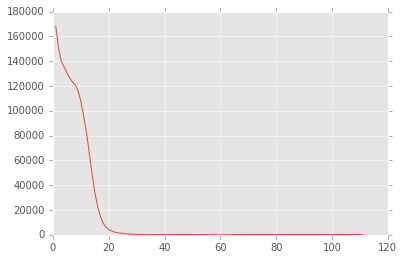

In [12]:
# Age of the car
data_analysis['Age_of_Vehicle'].value_counts().plot()
print ('Average age of vehicle:', data_analysis['Age_of_Vehicle'].mean(),"\n",
      'Median age of vehicle:', data_analysis['Age_of_Vehicle'].median())

We find that the majority of vehicles were 20 years old or less. The median age of the vehicles was 7 years. 

Average engine capacity of vehicle: 2028.2906977580221 
 Median engine capacity of vehicle: 1598.0


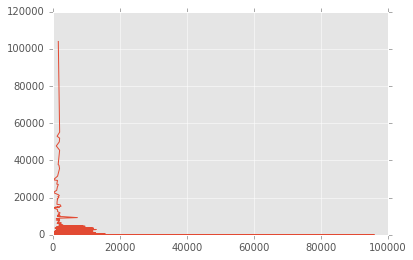

In [13]:
# Engine capacity
data_analysis['Engine_Capacity_.CC.'].value_counts().plot()
print ('Average engine capacity of vehicle:', data_analysis['Engine_Capacity_.CC.'].mean(),"\n",
      'Median engine capacity of vehicle:', data_analysis['Engine_Capacity_.CC.'].median())

Below we explore whether vehicles were left hand drive or not. 

No                              99.366841
Data missing or out of range     0.444324
Yes                              0.188835
Name: Was_Vehicle_Left_Hand_Drive, dtype: float64


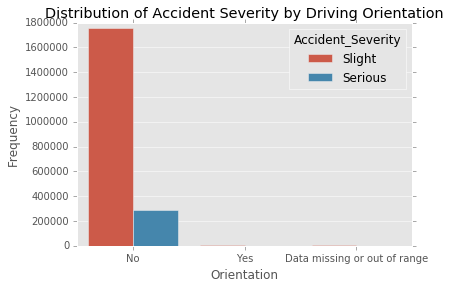

In [14]:
print (data_analysis['Was_Vehicle_Left_Hand_Drive'].value_counts(normalize=True)*100)
ax = sns.countplot(x="Was_Vehicle_Left_Hand_Drive", hue="Accident_Severity", data=data_analysis)
plt.title ('Distribution of Accident Severity by Driving Orientation')
plt.xlabel('Orientation')
plt.ylabel('Frequency')
plt.show()

The vast majority of cars were not left hand drive, which makes sense because the UK predominantly has right hand drive cars. 

Next, we explore the make of cars.

Vauxhall and Ford have the highest proportion of vehicles involved in accident. 

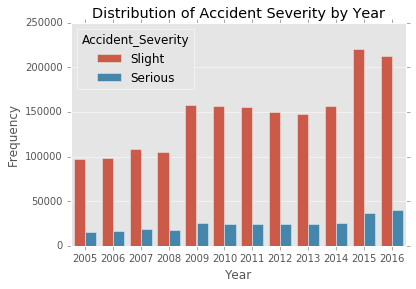

In [15]:
sns.countplot(x="Year", hue="Accident_Severity", data=data_analysis)
plt.title ('Distribution of Accident Severity by Year')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.show()

## 2.2 Driver characteristics

26 - 35                         20.612580
36 - 45                         19.858697
46 - 55                         16.089813
21 - 25                         11.005204
56 - 65                          9.487478
16 - 20                          8.053408
Data missing or out of range     7.907616
66 - 75                          4.237352
Over 75                          2.526030
11 - 15                          0.172901
6 - 10                           0.042849
0 - 5                            0.006073
Name: Age_Band_of_Driver, dtype: float64


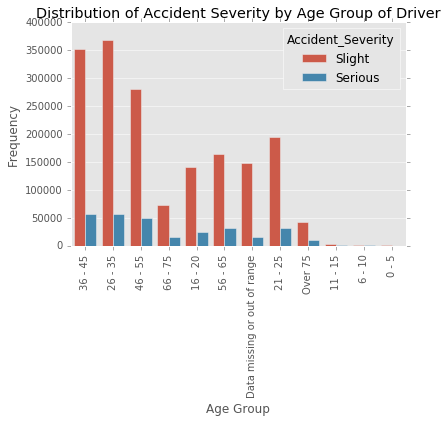

In [16]:
# Age of Driver
print(data_analysis['Age_Band_of_Driver'].value_counts(normalize=True)*100)
sns.countplot(x="Age_Band_of_Driver", hue="Accident_Severity", data=data_analysis)
plt.title ('Distribution of Accident Severity by Age Group of Driver')
plt.xlabel('Age Group')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()

Male                            67.188429
Female                          29.268153
Not known                        3.540114
Data missing or out of range     0.003304
Name: Sex_of_Driver, dtype: float64


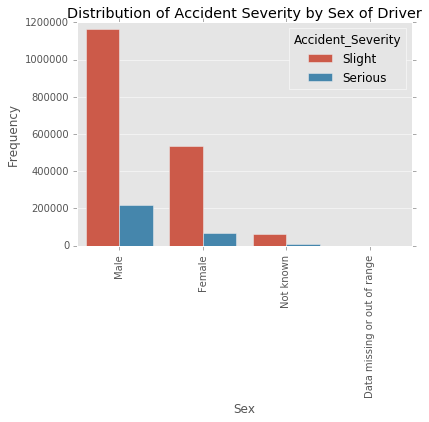

In [17]:
# Sex of Driver
print(data_analysis['Sex_of_Driver'].value_counts(normalize=True)*100)
sns.countplot(x="Sex_of_Driver", hue="Accident_Severity", data=data_analysis)
plt.title ('Distribution of Accident Severity by Sex of Driver')
plt.xlabel('Sex')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()

## 2.3 Road and weather conditions 

Give way or uncontrolled               49.110672
Data missing or out of range           36.307136
Auto traffic signal                    10.667370
Not at junction or within 20 metres     3.152436
Stop sign                               0.603476
Authorised person                       0.158909
Name: Junction_Control, dtype: float64


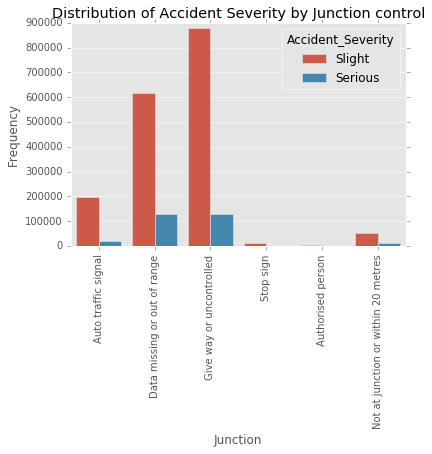

In [18]:
#Junction control
print(data_analysis['Junction_Control'].value_counts(normalize=True)*100)
sns.countplot(x="Junction_Control", hue="Accident_Severity", data=data_analysis)
plt.title ('Distribution of Accident Severity by Junction control')
plt.xlabel('Junction')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()

Not at junction or within 20 metres    39.322136
T or staggered junction                30.986520
Crossroads                             10.110435
Roundabout                              8.976306
Private drive or entrance               3.925072
Other junction                          2.684259
Slip road                               1.686400
More than 4 arms (not roundabout)       1.175957
Mini-roundabout                         1.124073
Data missing or out of range            0.008842
Name: Junction_Detail, dtype: float64


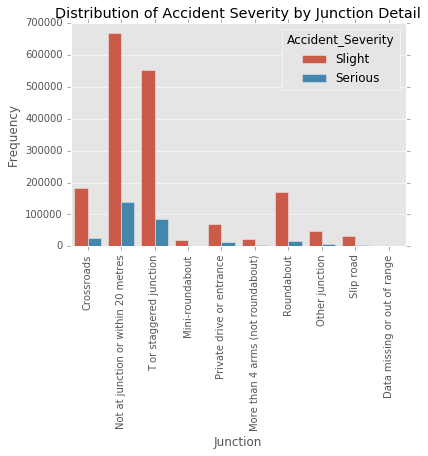

In [19]:
#Junction detail
print(data_analysis['Junction_Detail'].value_counts(normalize=True)*100)
sns.countplot(x="Junction_Detail", hue="Accident_Severity", data=data_analysis)
plt.title ('Distribution of Accident Severity by Junction Detail')
plt.xlabel('Junction')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()

Dry                             69.730005
Wet or damp                     27.521512
Frost or ice                     1.817861
Snow                             0.631022
Data missing or out of range     0.174212
Flood over 3cm. deep             0.125388
Name: Road_Surface_Conditions, dtype: float64


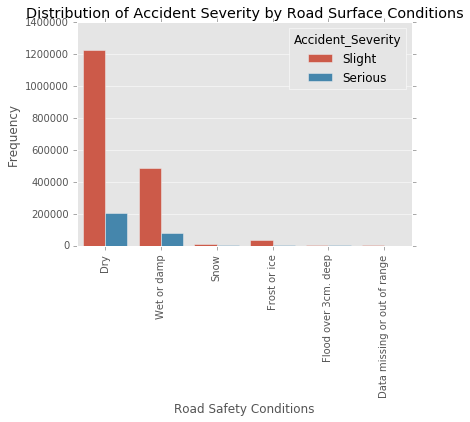

In [20]:
# Road surface conditions
print(data_analysis['Road_Surface_Conditions'].value_counts(normalize=True)*100)
sns.countplot(x="Road_Surface_Conditions", hue="Accident_Severity", data=data_analysis)
plt.title ('Distribution of Accident Severity by Road Surface Conditions')
plt.xlabel('Road Safety Conditions')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()

In [21]:
# Road type
print(data_analysis['Road_Type'].value_counts(normalize=True)*100)

Single carriageway              72.602127
Dual carriageway                17.069842
Roundabout                       6.848108
One way street                   1.773895
Slip road                        1.182321
Unknown                          0.523609
Data missing or out of range     0.000097
Name: Road_Type, dtype: float64


In [22]:
# Speed limits
data_analysis['Speed_limit'].value_counts(normalize=True)*100

30.0    60.843941
60.0    15.404721
40.0     9.084395
70.0     8.928978
50.0     4.098151
20.0     1.638551
10.0     0.000632
15.0     0.000534
0.0      0.000097
Name: Speed_limit, dtype: float64

In [23]:
# Urban or rural
data_analysis['Urban_or_Rural_Area'].value_counts(normalize=True)*100

Urban          62.400943
Rural          37.594685
Unallocated     0.004372
Name: Urban_or_Rural_Area, dtype: float64

In [24]:
# Weather condition
data_analysis['Weather_Conditions'].value_counts(normalize=True)*100

Fine no high winds              80.705574
Raining no high winds           11.589539
Other                            1.987118
Unknown                          1.793036
Raining + high winds             1.351190
Fine + high winds                1.235567
Snowing no high winds            0.659442
Fog or mist                      0.541778
Snowing + high winds             0.128012
Data missing or out of range     0.008745
Name: Weather_Conditions, dtype: float64

## 2.4 Day of travel


In [25]:
# day of week
data_analysis['Day_of_Week'].value_counts(normalize=True)

Friday       0.166049
Thursday     0.152754
Wednesday    0.152587
Tuesday      0.151570
Monday       0.143073
Saturday     0.128903
Sunday       0.105064
Name: Day_of_Week, dtype: float64

# 3. Feature Engineering 


From the EDA, we noticed that some variables had a value of "data missing or out of range". We will change all those to missing.

In [26]:
data_analysis_1=data_analysis.replace("Data missing or out of range", np.nan)

Given the volume of data, we will drop rows with missing values instead of imputing 

In [27]:
data_analysis_1=data_analysis_1.dropna()

## 3.1 Numeric Features

In [28]:
# Normalize the numeric features
data_analysis_1['Age_of_Vehicle']=np.log(data_analysis_1['Age_of_Vehicle'])
data_analysis_1['Engine_Capacity_.CC.']=np.log(data_analysis_1['Engine_Capacity_.CC.'])

In [29]:
data_analysis_1['Age_of_Vehicle'].describe()

count    1.007283e+06
mean     1.683954e+00
std      8.111992e-01
min      0.000000e+00
25%      1.098612e+00
50%      1.791759e+00
75%      2.302585e+00
max      4.709530e+00
Name: Age_of_Vehicle, dtype: float64

In [30]:
num_features=["Year", "Age_of_Vehicle", "Engine_Capacity_.CC."]

## 3.2 Time Features
Here we create different groups of time to reflect times accident happened (e.g early morning, rush hour evening or night)

In [31]:
data_analysis_1['Hour'] = data_analysis_1['Time'].str[0:2]
data_analysis_1['Hour'] = pd.to_numeric(data_analysis_1['Hour'])
data_analysis_1 = data_analysis_1.dropna(subset=['Hour'])
data_analysis_1['Hour'] = data_analysis_1['Hour'].astype('int')

In [32]:
def time_hour(time):
    if time >= 5 and time < 10:
        return "Early morning "
    elif time >= 10 and time < 15:
        return "Business hours"
    elif time >= 15 and time < 19:
        return "Rush hour"
    elif time >= 19 and time < 23:
        return "Evening"
    else:
        return "Night"

In [33]:
data_analysis_1['Time_of_day'] = data_analysis_1['Hour'].apply(time_hour)

## 3.3 Categorical Features

From the EDA, we noticed that missing values in some features were coded differently. In addition some categorical values had too many values and we will need to combine some into an other category. This section addresses that.

In [34]:
categorical_features=["Day_of_Week", "Junction_Control", "Junction_Detail",
                         "Road_Surface_Conditions", "Road_Type",
                         "Urban_or_Rural_Area", "Weather_Conditions","Age_Band_of_Driver",
                          "Sex_of_Driver", "Vehicle_Type", "Was_Vehicle_Left_Hand_Drive", "Light_Conditions", "Time_of_day"]

In [35]:
# Drop rows with unknown weather and road conditions 
data_analysis_1 = data_analysis_1[data_analysis_1.Weather_Conditions!='Unknown']
data_analysis_1 = data_analysis_1[data_analysis_1.Road_Type!='Unknown']
data_analysis_1 = data_analysis_1[data_analysis_1.Sex_of_Driver!='Unknown']

In [36]:
for col in categorical_features:
    data_analysis_1[col] = data_analysis_1[col].astype('category')

## 3.4 Creating the Final dataset for modelling

In [37]:
cat_dumm = pd.get_dummies(data_analysis_1[categorical_features], drop_first=True)

In [38]:
target=["Accident_Severity"]

In [39]:
data_ML = pd.concat([data_analysis_1[num_features], data_analysis_1[target],cat_dumm], axis=1)

In [40]:
data_ML.shape

(988886, 75)

In [41]:
data_ML['Accident_Severity'].value_counts()

Slight     862343
Serious    126543
Name: Accident_Severity, dtype: int64

# 4. Modelling

## 4.1.1 Splitting data

In [42]:
data_ML['Year'].dtypes

dtype('int64')

Splitting the data into train and test set. Using 2005 to 2013 data for training and 2014 to 2016 for testing. That's approximately 71% for training and 29% for testing

In [43]:
data_ML_train=data_ML[data_ML['Year']<2014]

In [44]:
data_ML_test=data_ML[data_ML['Year']>=2014]

In [45]:
data_ML_train.shape

(703227, 75)

In [46]:
data_ML_test.shape

(285659, 75)

In [47]:
X_train = data_ML_train.drop(['Accident_Severity', 'Year'], axis=1)
X_test = data_ML_test.drop(['Accident_Severity', 'Year'], axis=1)
y_train = data_ML_train['Accident_Severity']
y_test= data_ML_test['Accident_Severity']

In [48]:
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (703227, 73) (703227,)
Test set: (285659, 73) (285659,)


# 4.1.2 Dealing with imbalanced target variable
From the exploratory analysis, we observed that data was highly imbalanced. Hence we address the imbalanced claas here using  SMOTE (Synthetic Minority Oversampling Technique. 

In [49]:
!pip install -U imbalanced-learn

Requirement already up-to-date: imbalanced-learn in c:\users\alfre\anaconda3\lib\site-packages (0.7.0)


In [50]:
from imblearn.over_sampling import SMOTE 

In [51]:
y_train.value_counts()

Slight     614213
Serious     89014
Name: Accident_Severity, dtype: int64

In [52]:
sm = SMOTE()
X_train_sm, y_train_sm =sm.fit_resample(X_train, y_train)

In [53]:
# Explore target variable after smote
print('Accident Severity Classes before SMOTE:'), print(y_train.value_counts())
print('\nAAccident Severity Classes after SMOTE:'), print(y_train_sm.value_counts())

Accident Severity Classes before SMOTE:
Slight     614213
Serious     89014
Name: Accident_Severity, dtype: int64

AAccident Severity Classes after SMOTE:
Serious    614213
Slight     614213
Name: Accident_Severity, dtype: int64


(None, None)

## 4.2 Model estimation and evaluation

### 4.2.1 Decision Tree

In [54]:
accident_tree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
accident_tree.fit (X_train_sm, y_train_sm)
yhat_DT=accident_tree.predict(X_test)
print(classification_report(y_test, yhat_DT))
pred_score={}
pred_score['DT F1 score']=f1_score(y_test, yhat_DT, average='weighted')

              precision    recall  f1-score   support

     Serious       0.18      0.52      0.27     37529
      Slight       0.90      0.65      0.75    248130

    accuracy                           0.63    285659
   macro avg       0.54      0.58      0.51    285659
weighted avg       0.80      0.63      0.69    285659



### 4.2.2 Random Forest

In [56]:
rf= RandomForestClassifier(n_estimators=100, n_jobs=3)
rf.fit(X_train_sm,y_train_sm)
yhat_rf=rf.predict(X_test)
print(classification_report(y_test, yhat_rf))
pred_score['RF F1 score']=f1_score(y_test, yhat_rf, average='weighted')

              precision    recall  f1-score   support

     Serious       0.20      0.19      0.19     37529
      Slight       0.88      0.88      0.88    248130

    accuracy                           0.79    285659
   macro avg       0.54      0.54      0.54    285659
weighted avg       0.79      0.79      0.79    285659



### 4.2.3 Logistic Regression

In [57]:
LR = LogisticRegression(C=0.01, solver='liblinear')
LR.fit(X_train_sm, y_train_sm)
yhat_LR=LR.predict(X_test)
yhat_prob = LR.predict_proba(X_test)
print(classification_report(y_test, yhat_LR))
pred_score['LR F1 score']=f1_score(y_test, yhat_LR, average='weighted')
pred_score['LR log loss']=log_loss(y_test, yhat_prob)

              precision    recall  f1-score   support

     Serious       0.18      0.44      0.26     37529
      Slight       0.89      0.70      0.79    248130

    accuracy                           0.67    285659
   macro avg       0.54      0.57      0.52    285659
weighted avg       0.80      0.67      0.72    285659



In [58]:
pred_score

{'DT F1 score': 0.6893497531445907,
 'RF F1 score': 0.7896685889564123,
 'LR F1 score': 0.7165718420672454,
 'LR log loss': 0.6168422058756079}

Text(0.5, 1.0, 'Confusion Matrix for Decision Tree')

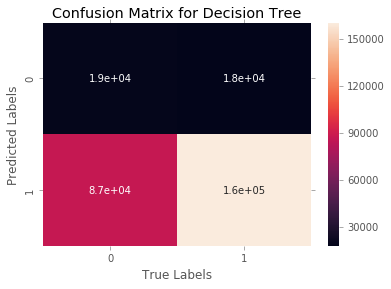

In [76]:
# confusion matrices
## Decision tree
dt_conf_mat = confusion_matrix (y_test, yhat_DT)
sns.heatmap(dt_conf_mat, annot=True)
plt.xlabel('True Labels'), plt.ylabel('Predicted Labels')
plt.title ('Confusion Matrix for Decision Tree')

Text(0.5, 1.0, 'Confusion Matrix for Random Forest')

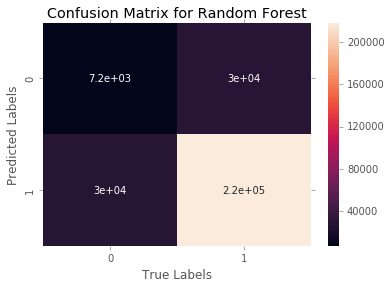

In [77]:
## Random forest
rf_conf_mat = confusion_matrix (y_test, yhat_rf)
sns.heatmap(rf_conf_mat, annot=True)
plt.xlabel('True Labels'), plt.ylabel('Predicted Labels')
plt.title ('Confusion Matrix for Random Forest')

Text(0.5, 1.0, 'Confusion Matrix for Logistic Regression')

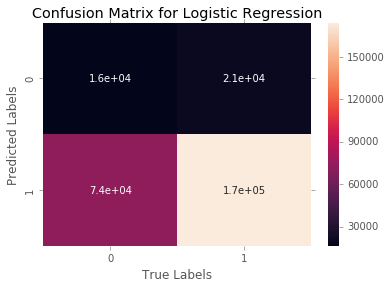

In [78]:
## Logistic reg
lr_conf_mat = confusion_matrix (y_test, yhat_LR)
sns.heatmap(lr_conf_mat, annot=True)
plt.xlabel('True Labels'), plt.ylabel('Predicted Labels')
plt.title ('Confusion Matrix for Logistic Regression')

# 4.3 Feature importance
Since random forest was the best performing model, the feature importance is estimated using the RF model 

Text(0.5, 0, 'Relative Importance')

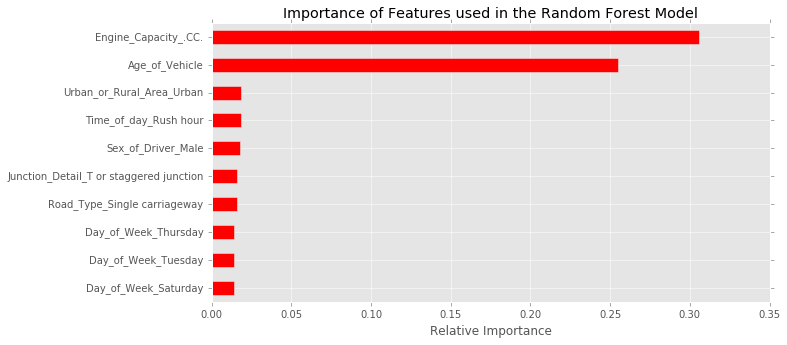

In [67]:
feat_importances = pd.Series(rf.feature_importances_, index=X_test.columns)
feat_importances.nlargest(10).sort_values().plot(kind='barh', color='r', figsize=(10,5))
plt.title('Importance of Features used in the Random Forest Model')
plt.xlabel('Relative Importance')